In [1]:
! mkdir dataset

In [2]:
cd dataset

C:\Users\pc\PycharmProjects\DylogT1\Xception\dataset


In [3]:
! kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset


  0%|          | 0.00/1.25G [00:00<?, ?B/s]
  0%|          | 1.00M/1.25G [00:00<03:04, 7.24MB/s]
  0%|          | 4.00M/1.25G [00:00<01:13, 18.3MB/s]
  0%|          | 6.00M/1.25G [00:01<04:36, 4.82MB/s]
  1%|          | 8.00M/1.25G [00:01<03:21, 6.62MB/s]
  1%|          | 10.0M/1.25G [00:01<04:33, 4.86MB/s]
  1%|          | 11.0M/1.25G [00:02<06:22, 3.47MB/s]
  1%|1         | 13.0M/1.25G [00:03<06:01, 3.66MB/s]
  1%|1         | 15.0M/1.25G [00:03<04:21, 5.06MB/s]
  1%|1         | 17.0M/1.25G [00:03<03:20, 6.60MB/s]
  1%|1         | 19.0M/1.25G [00:03<03:18, 6.64MB/s]
  2%|1         | 21.0M/1.25G [00:04<06:19, 3.47MB/s]
  2%|1         | 22.0M/1.25G [00:04<05:33, 3.95MB/s]
  2%|1         | 25.0M/1.25G [00:05<03:25, 6.40MB/s]
  2%|2         | 27.0M/1.25G [00:05<03:01, 7.21MB/s]
  2%|2         | 29.0M/1.25G [00:05<04:27, 4.90MB/s]
  2%|2         | 31.0M/1.25G [00:06<03:56, 5.53MB/s]
  3%|2         | 34.0M/1.25G [00:06<03:21, 6.48MB/s]
  3%|2         | 36.0M/1.25G [00:07<04:02, 5.36MB/s]
 

In [4]:
import zipfile
with zipfile.ZipFile('plant-disease-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [51]:
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator as IDG
from keras.applications import Xception as X
from keras.applications.xception import preprocess_input

In [45]:
data = 'dataset'

train = 'dataset/Train/Train'
valid = 'dataset/Validation/Validation'
test = 'dataset/Test/Test'


In [46]:
def dirs(dir_path):
    for dirpaths, dirnames, filenames in os.walk(dir_path):
        print(f"{len(dirnames)} no. of Directories and {len(filenames)} no. of Files in '{dirpaths}'.")

dirs(train)

3 no. of Directories and 0 no. of Files in 'dataset/Train/Train'.
0 no. of Directories and 458 no. of Files in 'dataset/Train/Train\Healthy'.
0 no. of Directories and 430 no. of Files in 'dataset/Train/Train\Powdery'.
0 no. of Directories and 434 no. of Files in 'dataset/Train/Train\Rust'.


In [47]:
## PARAMETERS

EPOCHS=10
BATCH_SIZE=32
IMG_SIZE=(224,224)

In [48]:
train_datagen = IDG(rescale=1/.255,
                    horizontal_flip = True,
                    vertical_flip=True,
                    zoom_range=0.3,
                    shear_range=0.3,
                    height_shift_range=0.2,
                    width_shift_range=0.2,
                    rotation_range=23,
                    preprocessing_function=preprocess_input,
                    fill_mode='nearest',
)

valid_datagen = IDG(
    rescale=1/.255,
#     horizontal_flip = True,
#     vertical_flip=True,
#     zoom_range=0.3,
#     shear_range=0.3,
#     height_shift_range=0.2,
#     width_shift_range=0.2,
#     rotation_range=23,
#     preprocessing_function=preprocess_input,
#     fill_mode='nearest',
)

train_gen = train_datagen.flow_from_directory(train,
                                              target_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical',
                                              shuffle=True,
)

valid_gen = train_datagen.flow_from_directory(test,
                                              target_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical',
                                              shuffle=False,
)

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [49]:
class_names = train_gen.class_indices
names = list(class_names)
names

['Healthy', 'Powdery', 'Rust']

In [50]:
class_count = len(names)
class_count

3

In [52]:
new_input = layers.Input(shape=(224, 244, 3))

base_model = X(weights='imagenet',
              input_tensor=new_input,
              include_top=False,
              classes=class_count,
              pooling='avg')

for layer in base_model.layers:
    layer.trainable=False

83683744/83683744 [==============================] - 11s 0us/step


In [54]:
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(class_count,activation='softmax')(x)

model = Model(base_model.input, x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 121, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 121, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

 block4_sepconv1_bn (BatchNorma  (None, 28, 30, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 30, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 30, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 30, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 15, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 15, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 15, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 15, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 15, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 15, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 15, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 15, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 15, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 15, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [55]:
opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [56]:
history= model.fit(train_gen, epochs=EPOCHS, validation_data=valid_gen, validation_steps=valid_gen.samples//BATCH_SIZE, steps_per_epoch= train_gen.samples // BATCH_SIZE, verbose=1)

Epoch 1/10
41/41 [==============================] - 99s 2s/step - loss: 0.8446 - accuracy: 0.6318 - val_loss: 0.6279 - val_accuracy: 0.7344
Epoch 2/10
41/41 [==============================] - 70s 2s/step - loss: 0.5304 - accuracy: 0.7876 - val_loss: 0.5149 - val_accuracy: 0.7969
Epoch 3/10
41/41 [==============================] - 66s 2s/step - loss: 0.4717 - accuracy: 0.8155 - val_loss: 0.6137 - val_accuracy: 0.7656
Epoch 4/10
41/41 [==============================] - 66s 2s/step - loss: 0.4294 - accuracy: 0.8233 - val_loss: 0.5070 - val_accuracy: 0.7891
Epoch 5/10
41/41 [==============================] - 66s 2s/step - loss: 0.3717 - accuracy: 0.8558 - val_loss: 0.4538 - val_accuracy: 0.8125
Epoch 6/10
41/41 [==============================] - 66s 2s/step - loss: 0.3637 - accuracy: 0.8612 - val_loss: 0.5997 - val_accuracy: 0.7891
Epoch 7/10
41/41 [==============================] - 66s 2s/step - loss: 0.3529 - accuracy: 0.8643 - val_loss: 0.5148 - val_accuracy: 0.8359
Epoch 8/10
41/41 [==

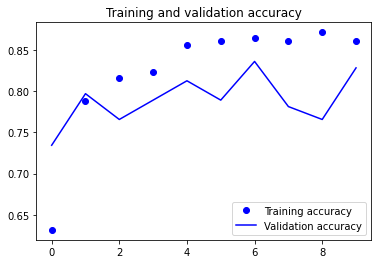

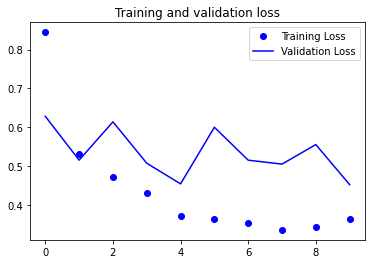

In [57]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    
    plt.show()
    
plot_loss_acc(history)